
# Project: Medical Appointments Data Analysis

The dataset analyzed was gotten from Kaggle. It collected information from 100k medical appointments in Brazil and is focused on the question of whether or not patients were present or not on their appointment date. A number of characteristics about the patient were included in each row.
a)‘ScheduledDay’ tells us on what day the patient set up their appointments.
b)‘Neighborhood’ indicates the location of the hospital.
c)‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [3]:
# import all the packages I will be using for this investogation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load data and print out the first 5 lines. 
#   types and look for instances of missing or possibly errant data.

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#Perform operation to get informations about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Perform operation to get more statistical informations about dataset

df.describe()

#findings
#An irregularity was found in the age which is not obtainable (-1);less than 0. 0year. 
#Column names in Capital letters
#some column names not properly spelt


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#Perform operation to get the number of rows and columns contained in the dataset

sample_size,columns_size = df.shape
print(f'The dataset has {sample_size}-samples/rows and {columns_size}-columns')

The dataset has 110527-samples/rows and 14-columns


In [8]:
#Perform operation to find the number of unique values contained in the dataset

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [12]:
#Perform operation to display rows that are duplicated as true

sum(df.duplicated())

0

In [10]:
#Perform operation to check for null values within the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [13]:
#Perform an operation to print out the last 5 lines.
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No



# Data findings and appropropriate cleaning
a)An irregularity was found in the age which is not obtainable (-1);less than 0. 0year. 
b)Column names displayed in Capital letters which can be confusing.
c)the column 'no-show' is a bit confusing to data readers
d)some column names are not properly spelt

In [11]:
#query the irregualar age (-1) in a bid to correct it

df.query('Age < 0') 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
#Perform an operation to drop the irregular age column since it just 1

df.drop(df.query('Age < 0').index,inplace=True)

In [16]:
#Perform an operation to format the column names from uppercase to lowercase

df.rename(columns= lambda x: x.lower(),inplace=True)

In [53]:
#Perform an operation to change no_show column name to present (negative to positive)

df.rename({'no-show':"present"},axis=1,inplace=True)

In [54]:
#Perform an operation to change No to yes and vice versa to correspond to the column name changed

df["present"] = np.where(df["present"] =="No","yes","no")

In [55]:
#Perform an operation to view changes
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,present
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,no
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,no
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,no
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,no
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,no


In [58]:
#lets rename the hipertension,handcap and no-show columns

df.rename(columns={'hipertension' : 'hypertension', 'handcap' : 'handicapped','no-show' : 'showed'}, inplace=True)

In [59]:
#Perform an operation to recheck statistical informations about dataset if cleaned

df.describe()

#all looking good!

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Summary of cleaning
1) I dropped the non-conforming age column since it is 1
2) I changed the upper case letters of the column names to lower case
3) I renamed some columns; hipertension, handcap and no-show
4) I renamed the column 'no-show' to 'present' for easy understanding

<a id='eda'></a>
# Exploratory Data Analysis



### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)


### First  lets consider the factor 'patientid'

### Question 2; How many patients are present in the dataset and does the statistics affect the number of times they were present for their appointment?

In [35]:
#Perform an operation to get the statistics of the patientd

unique_patientid = df.patientid.nunique()
print(f"This sample has {unique_patientid} patients")

This sample has 62298 patients


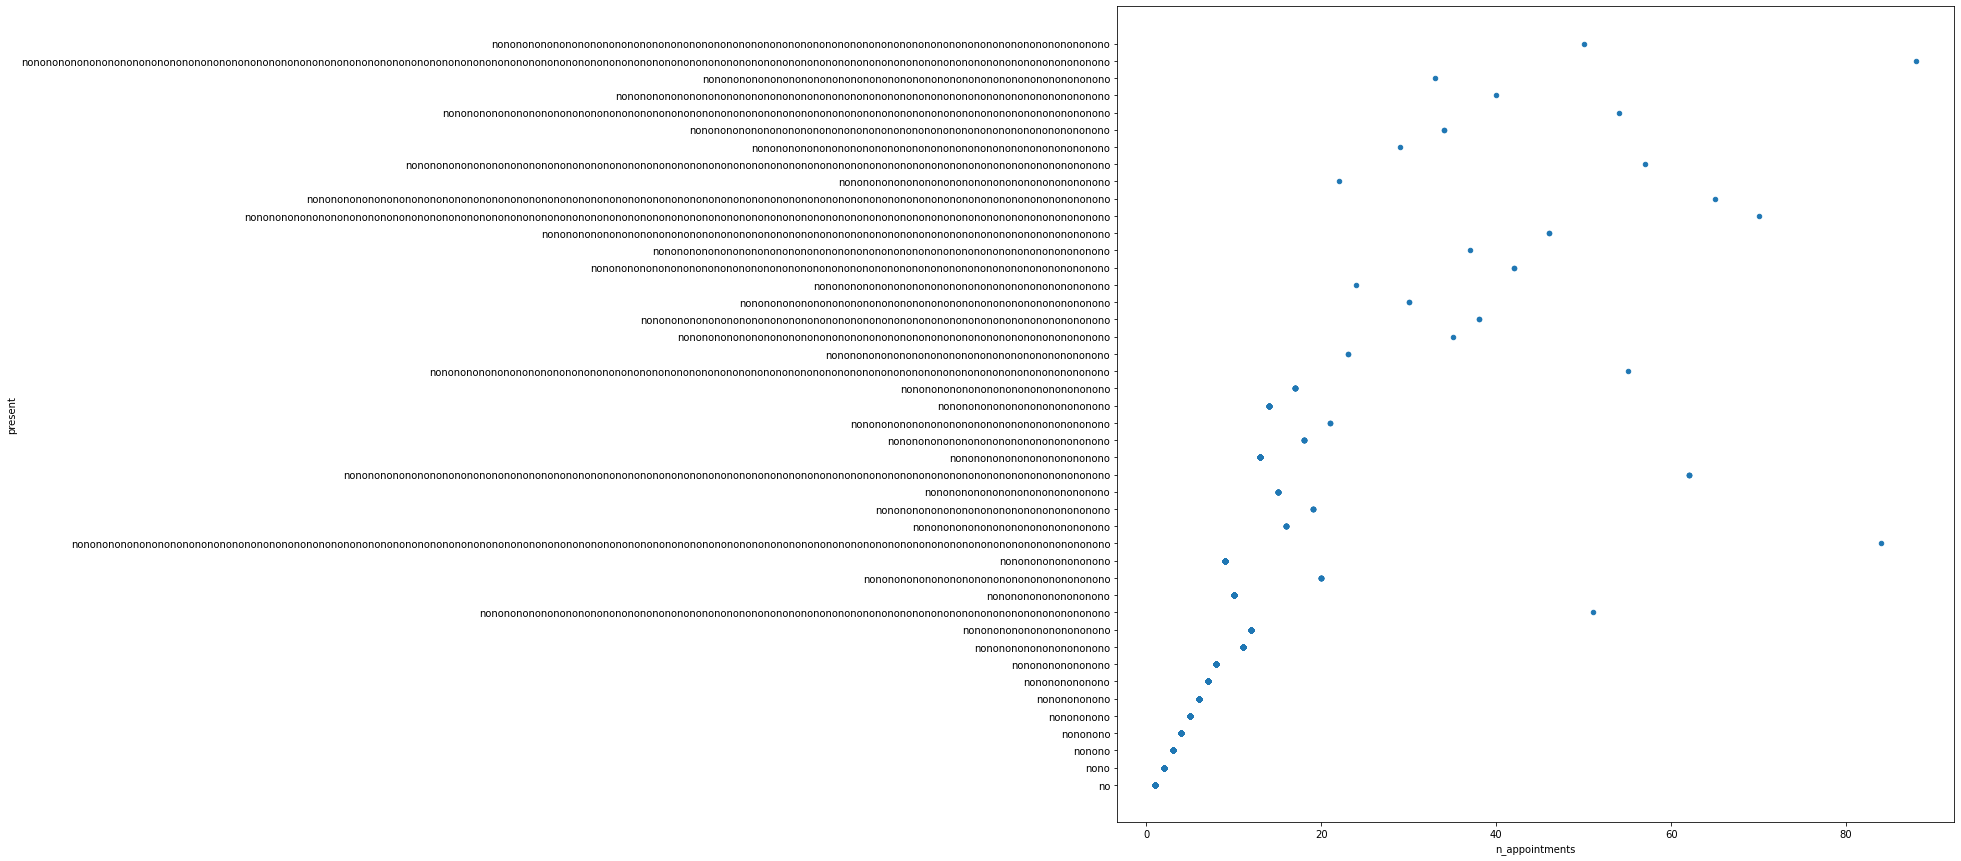

In [56]:
#Perform an operation to correlate the number of times a patient was on appointment and the number of times the patient was present

agg= df.groupby('patientid').agg({'patientid':np.size,'present':np.sum})
agg.rename({'patientid':"n_appointments"},axis=1,inplace=True)
agg.plot.scatter(x='n_appointments',y='present',figsize=(15,15));

### Summary on patientid

a)The sample has 62298 patients
b)The scatter plot graph shows that the number of times a patient is given an appointment does not negatively affect the number of times he will be present.

### Considering the factor 'gender'

### Question 3; which gender were present most on their appointment days?

In [62]:
# let's get the gender distribution of the patients
gender_distribution = df.groupby(['patientid','gender'],as_index=False).count()["gender"].value_counts()

In [65]:
# let's get their percentage 

female_percent = (gender_distribution['F'],unique_patientid)
male_percent = (gender_distribution['M'],unique_patientid)

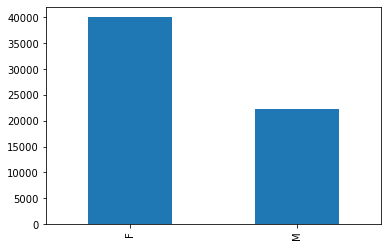

In [68]:
#plot bar chart displaying gender distribution of patients

gender_distribution.plot.bar(figsize(15,15));

In [10]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

### Summary on Gender
The sample have a total number of 62298 patients; 40,000 females and 22,298 males.
The patient and gender data set numbers are almost the same, stating there is an even number of appointments distributed between both gender of patients in the dataset.
From the statistics; it is clear gender do not affect the number of patients that will be present for their appointments, nevertheless females are likely to be more absent than males.

### Conclusions

The dataset has 110527 medical appointments samples of 62298 patients. Judging from the statistics, there is a great possibility that each patient is likely to have multiple appointment records in the dataset. 
The data gotten further shows that the number of times a patient is given appointments correlates positively to the number of times he is present for the appointment, which draws a conclusion that patients showed up approximately 80% and failed to show up 20% of the times they were given appointments.

The analyzed dataset shows a total of 62,298 patients, 40,000 females and 22,298 males.The patient and gender data set numbers are almost the same, stating there is an even number of appointments distributed between both gender of patients in the dataset. From the statistics; it is clear gender do not affect the number of patients that will be present for their appointments, nevertheless females are likely to be more absent than males.All other factors do not affect the possibility of patients being present on their appointment day.

#### Limitations

a)An irregularity was found in the age which is not obtainable (-1);less than 0. 0year.
b) Very little insight from the neighbourhood feature